# Pymaceuticals Inc.
---

### Analysis

Based on the given information below, here are 3 summary observations:

Data Quality and Consistency:

The dataset contains inconsistencies, such as duplicate observations for a single mouse on specific days. This highlights the importance of data cleaning and quality control.
The presence of duplicate observations can significantly impact the analysis and potentially lead to biased results.

Survival Rates and Treatment Efficacy:

Not all mice survived the full 45-day trial, indicating varying levels of treatment efficacy.
Analyzing the survival rates and time to tumor progression for different drug regimens can provide valuable insights into their effectiveness.

Impact of Drug Regimens on Tumor Volume:

The data can be used to assess the impact of different drug regimens on tumor volume over time.
By comparing the tumor volume trajectories of mice treated with different drugs, it's possible to identify potential differences in treatment efficacy.

It's important to note that further analysis, such as statistical tests and visualizations, is necessary to draw definitive conclusions about the effectiveness of the drug regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df= pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
print(merge_df.shape)
merge_df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Identify duplicate mice
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice
# Extract data for duplicate mice
#duplicate_data = mouse_metadata_study[mouse_metadata_study['Mouse ID'].isin(duplicate_mice)]
#duplicate_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df[merge_df['Mouse ID'] != "g989"]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
print(clean_data.shape)
clean_data.info()

(1880, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [6]:
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

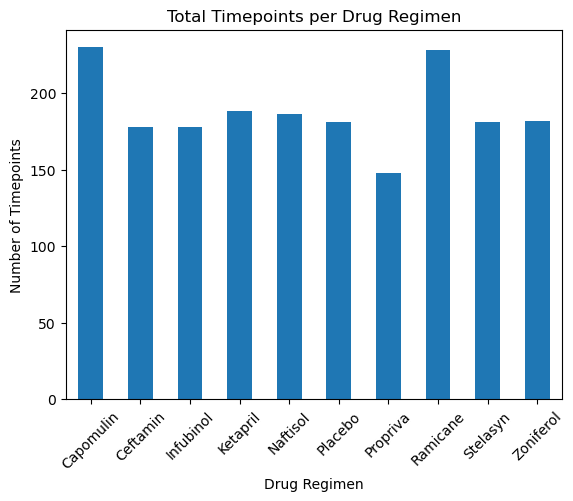

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of timepoints for each drug regimen
timepoints_per_regimen = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot
timepoints_per_regimen.plot(kind='bar')
plt.title('Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

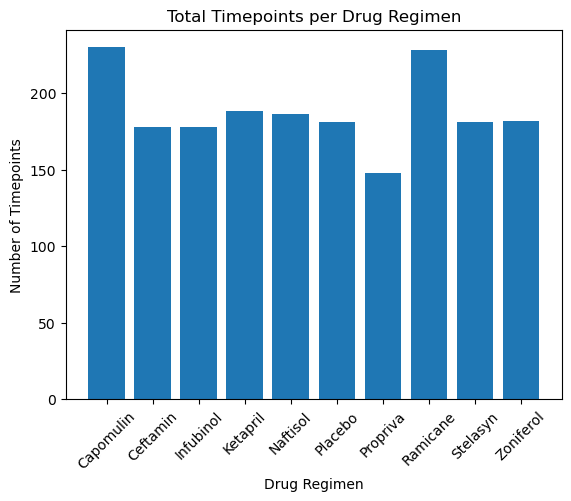

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Count the number of timepoints for each drug regimen
timepoints_per_regimen = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using pyplot
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Timepoints per Drug Regimen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
unique_mice = clean_data[['Mouse ID', 'Sex']].value_counts()
unique_mice 

Mouse ID  Sex   
a203      Female    10
l897      Male      10
m546      Male      10
m550      Male      10
m601      Male      10
                    ..
d133      Male       1
b447      Male       1
u153      Female     1
v199      Female     1
t573      Female     1
Name: count, Length: 248, dtype: int64

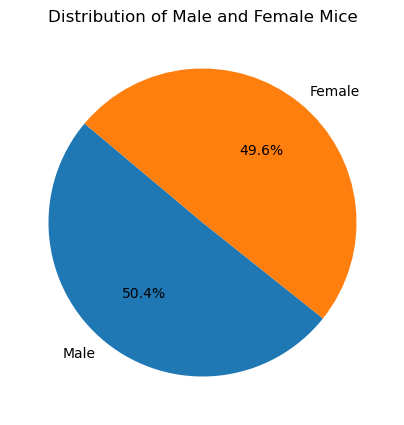

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice for each sex
sex_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using Pandas
sex_counts.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(5, 5))
plt.title('Distribution of Male and Female Mice')
plt.ylabel('')  # Remove the y-axis label
plt.show()



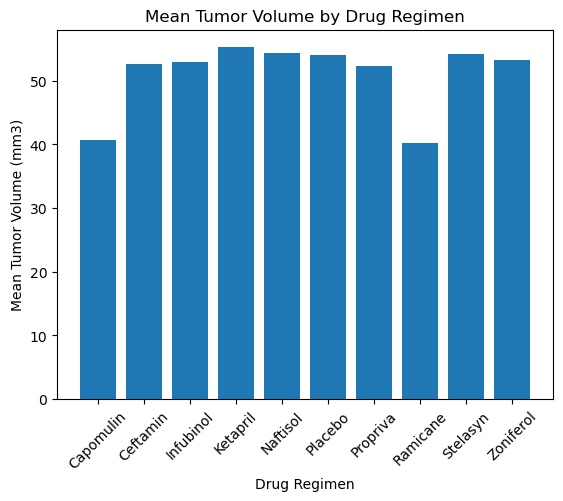

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Group the data by 'Drug Regimen' and calculate the mean tumor volume
mean_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Create a bar plot
plt.bar(mean_tumor_volume.index, mean_tumor_volume.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Mean Tumor Volume by Drug Regimen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

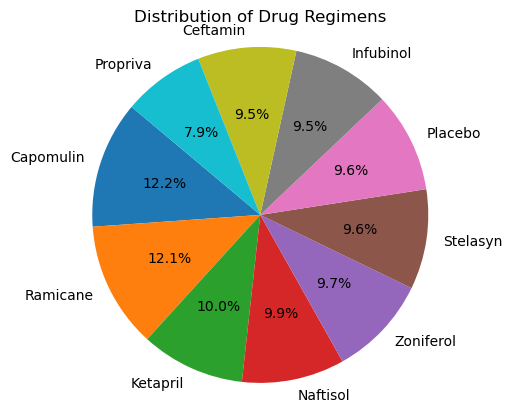

In [13]:


# Count the number of unique mice for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a pie chart
plt.pie(drug_regimen_counts, labels=drug_regimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Drug Regimens')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Get the last timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoint with the original DataFrame
merged_df = pd.merge(clean_data, last_timepoint, on=['Mouse ID', 'Timepoint'])

# Filter for the specified drug regimens
filtered_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


print(filtered_df )


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
7       u153          0           45.000000                 0     Ceftamin   
8       b447          0           45.000000                 0     Ceftamin   
10      x226          0           45.000000                 0     Ceftamin   
11      t573          0           45.000000                 0     Ceftamin   
20      c326          5           36.321346                 0    Infubinol   
..       ...        ...                 ...               ...          ...   
234     a644         45           32.978522                 1     Ramicane   
240     i177         45           33.562402                 3     Ramicane   
243     r944         45           41.581521                 2    Capomulin   
244     u364         45           31.023923                 3    Capomulin   
245     p438         45           61.433892                 1     Ceftamin   

        Sex  Age_months  Weight (g)  
7    Female          11  

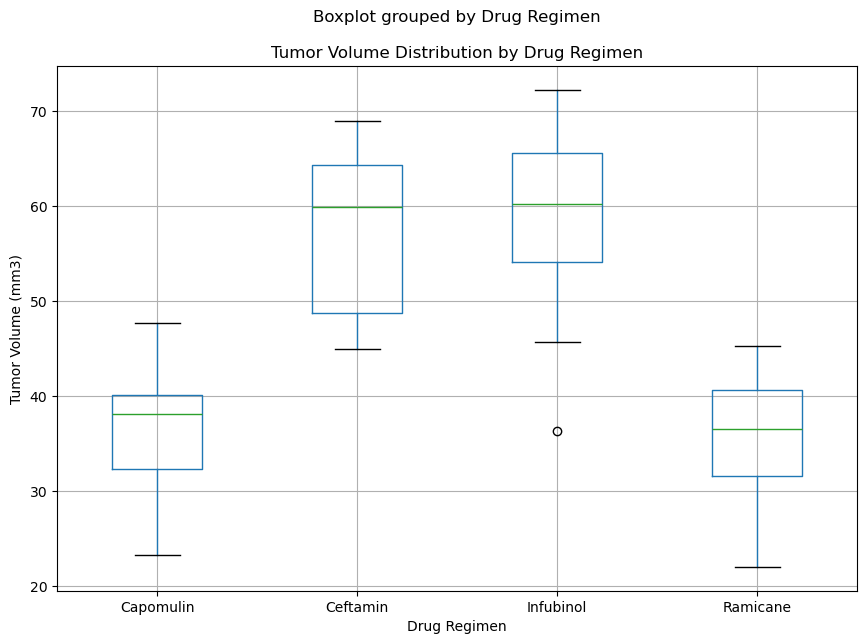

In [21]:


# Create a box plot
filtered_df.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', figsize=(10, 7))
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

In [22]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


# Specify the drug regimens of interest
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the specified drug regimens
filtered_df = merged_df[merged_df['Drug Regimen'].isin(drug_regimens)]

# Calculate IQR and identify outliers for each drug regimen
for drug in drug_regimens:
    drug_data = filtered_df[filtered_df['Drug Regimen'] == drug]
    
    # Calculate quartiles and IQR
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25,.75])
    lower_bound = quartiles[0.25] - (1.5 * (quartiles[0.75] - quartiles[0.25]))
    upper_bound = quartiles[0.75] + (1.5 * (quartiles[0.75] - quartiles[0.25]))
    
    # Identify outliers
    outliers = drug_data[(drug_data['Tumor Volume (mm3)'] < lower_bound) | (drug_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Outliers for {drug}:")
    print(outliers)


Outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Outliers for Ramicane:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Outliers for Infubinol:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
20  Female          18          25  
Outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create an empty list to store tumor volume data for each drug
tumor_vol_data = []

for drug in drug_regimens:
    # Filter data for the current drug regimen
    drug_data = clean_data[clean_data['Drug Regimen'] == drug]
    
    # Calculate quartiles and IQR
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25, .75])
    lower_bound = quartiles[0.25] - (1.5 * (quartiles[0.75] - quartiles[0.25]))
    upper_bound = quartiles[0.75] + (1.5 * (quartiles[0.75] - quartiles[0.25]))
    
    # Identify outliers
    outliers = drug_data[(drug_data['Tumor Volume (mm3)'] < lower_bound) | (drug_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Outliers for {drug}:")
    print(outliers)
    
    # Append tumor volume data to the list
    tumor_vol_data.append(drug_data['Tumor Volume (mm3)'])

Outliers for Capomulin:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1652     s185         40           25.472143                 1    Capomulin   
1849     s185         45           23.343598                 1    Capomulin   

         Sex  Age_months  Weight (g)  
1652  Female           3          17  
1849  Female           3          17  
Outliers for Ramicane:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1814     k403         45           22.050126                 1     Ramicane   

       Sex  Age_months  Weight (g)  
1814  Male          21          16  
Outliers for Infubinol:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_99320/3160901276.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=drug_regimens)


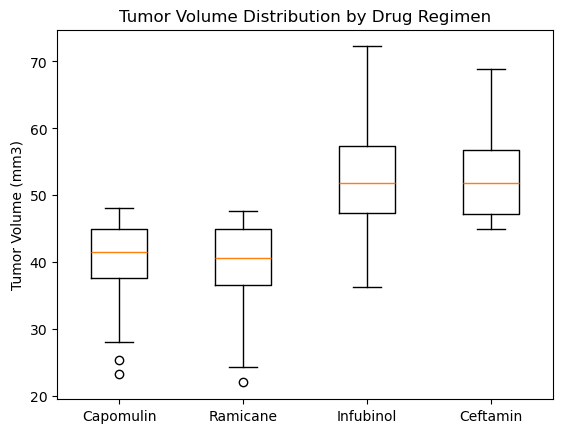

In [27]:
# Create a box plot
plt.boxplot(tumor_vol_data, labels=drug_regimens)
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

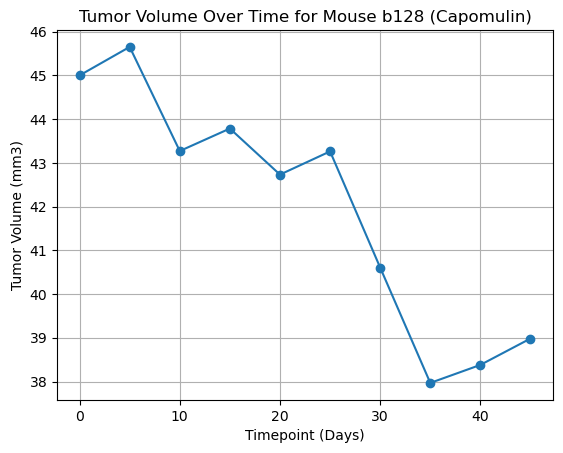

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select data for a specific mouse treated with Capomulin
mouse_data = clean_data.loc[clean_data['Mouse ID'] == 'b128']

# Plot the timepoint vs. tumor volume for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Customize the plot
plt.title('Tumor Volume Over Time for Mouse b128 (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

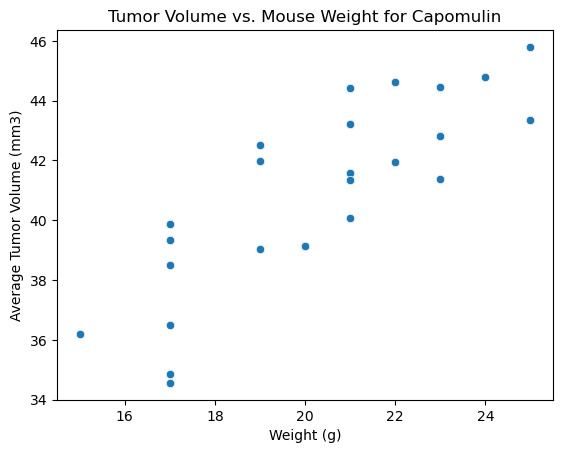

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter for Capomulin regimen
capomulin_df = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate average tumor volume
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the original DataFrame
merged_df = pd.merge(capomulin_df, avg_tumor_vol, on='Mouse ID')

# Create a scatter plot
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)_y', data=merged_df)

# Set plot title and labels
plt.title('Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425969


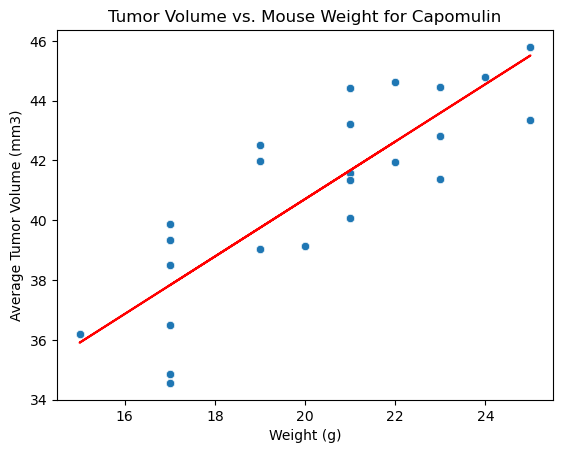

In [31]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# ... (rest of your code)

# Calculate the correlation coefficient
correlation_coefficient = merged_df['Weight (g)'].corr(merged_df['Tumor Volume (mm3)_y'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Create a linear regression model
x = merged_df['Weight (g)']
y = merged_df['Tumor Volume (mm3)_y']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the scatter plot with the regression line
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)_y', data=merged_df)
plt.plot(x, slope*x + intercept, color='red')
plt.title('Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()